# Regression Analysis - Accurate Pricing for real estate

### Code Developed by - Shivang Baijal

## Table of Contents

* [1. Introduction](#introduction)
* [2. Importing Libraries](#library)
* [3. Task  - Regression Analysis](#drs)
	* [3.1 Importing Datasets](#format)
    * [3.2 Missing Value Imputation](#format)
    * [3.3 Univariate Analysis - Normality Conversion (Tukey Ladder)](#normal)
	* [3.4 Univariate Analysis - Outlier Analysis](#unioutlier)
    * [3.5 Bi-Variate(Variable Importance)](#scale)
	* [3.6 Bi-Variate(Outlier Detection)](#linearity)
	* [3.7 Linear Regression Fit(All possible combination)](#linear)
	* [3.8 Residual Distribution](#residual)
    * [3.9 Final FInding and Recommendation](#recommend)
* [5. Summary](#summary)
* [6. References](#reference)

### 1. Introduction 

<b>Project Objective</b>
Informed Decision Making, an organization owning set of real estate properties in Victoria, Australia wants to estimate the selling price based on the past data they have extracted from different datasources.

<b>1. Data Integration </b>
The data consist of information of latitude and longitute, the user has used Haversine formula to compute nearby distance of various utiliy centers taken from Victoria Utility address and Google Map API

<b>2. Feautre Engineering </b>
As the real estate prices are variable due to Market Inflation, we propose using the index funds of top real estate australian stock market to fit the general inflation present in the market, the data added is based on monthly average of the stock prices.

<b>3. Data Transformation </b>
This project leverages Box-Cox Transformation and Tukey Ladders to improve normality of dataset, which boost performance of Linear Models


### 2. Importing Relevant Libraries 

In [119]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [120]:
df=pd.read_csv('Dataset_Machine_Learning.csv')

## Missing Value Imputation

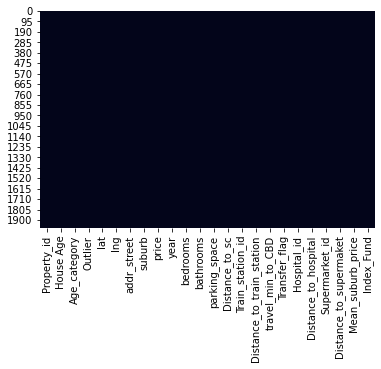

In [121]:
ax=sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

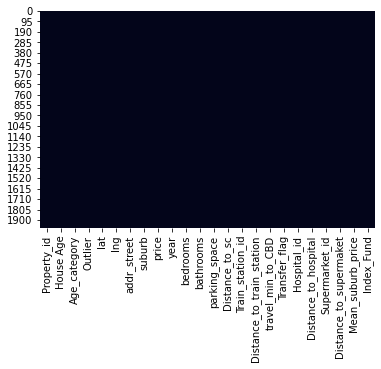

In [122]:
df=df.dropna()
sns.heatmap(df.isnull(), cbar=False)

## 2. Variable Importance
### Categorical Variable

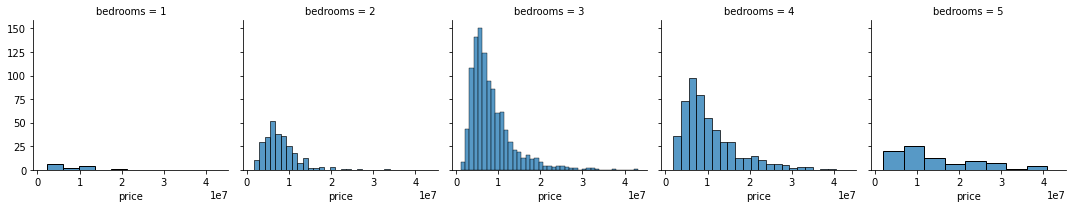

In [123]:
g = sns.FacetGrid(df, col="bedrooms")
g.map(sns.histplot, "price")

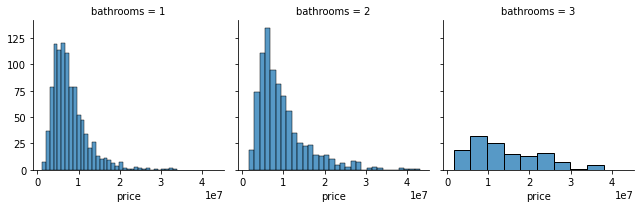

In [124]:
g = sns.FacetGrid(df, col="bathrooms")
g.map(sns.histplot, "price")

### Numerical Variable

C:\Users\Shivang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivang

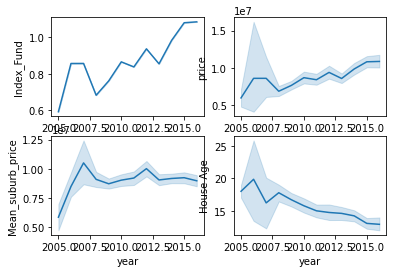

In [125]:
fig, axes = plt.subplots(2, 2)
ax=sns.lineplot(df["year"],df["Index_Fund"],ax=axes[0, 0])
ax=sns.lineplot(df["year"],df["price"],ax=axes[0, 1])
ax=sns.lineplot(df["year"],df["Mean_suburb_price"],ax=axes[1, 0])
ax=sns.lineplot(df["year"],df["House Age"],ax=axes[1, 1])

C:\Users\Shivang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shivang

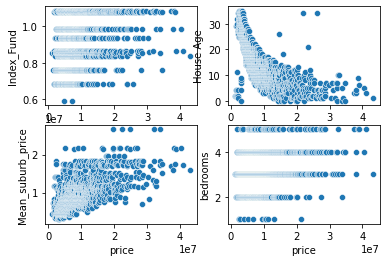

In [133]:
#sns.scatterplot(y="price",x="Index Fund Price",data=df)
fig, axes = plt.subplots(2, 2)
ax=sns.scatterplot(df["price"],df["Index_Fund"],ax=axes[0, 0])
ax=sns.scatterplot(df["price"],df["bedrooms"],ax=axes[1, 1])
ax=sns.scatterplot(df["price"],df["Mean_suburb_price"],ax=axes[1, 0])
ax=sns.scatterplot(df["price"],df["House Age"],ax=axes[0, 1])

Pearsons correlation: 0.218


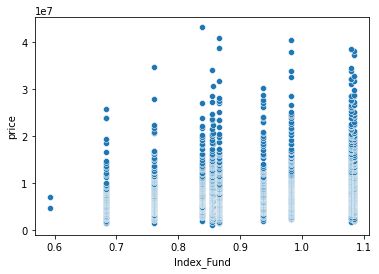

In [127]:
sns.scatterplot(y="price",x="Index_Fund",data=df)
corr, _ = pearsonr(df['price'], df["Index_Fund"]) 
print('Pearsons correlation: %.3f' % corr)

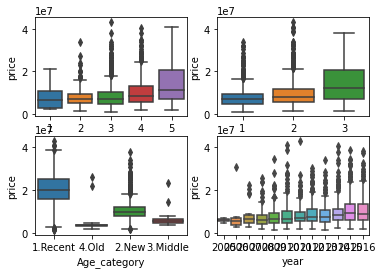

In [128]:
fig, axes = plt.subplots(2, 2)
ax = sns.boxplot(y="price",x="bedrooms", data=df, orient='v', 
    ax=axes[0, 0])
ax = sns.boxplot(y="price",x="bathrooms",  data=df, orient='v', 
    ax=axes[0, 1])
ax = sns.boxplot(y="price", x="Age_category", data=df, orient='v', 
    ax=axes[1, 0])
ax = sns.boxplot(y="price", x="year",data=df, orient='v', 
    ax=axes[1, 1])

## Outlier Detection

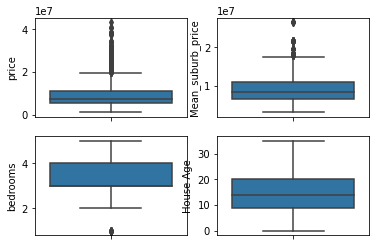

In [129]:
fig, axes = plt.subplots(2, 2)
ax = sns.boxplot(y="price", data=df, orient='v', 
    ax=axes[0, 0])
ax = sns.boxplot(y="Mean_suburb_price",  data=df, orient='v', 
  
                 ax=axes[0, 1])
ax = sns.boxplot(y="bedrooms", data=df, orient='v', 
    ax=axes[1, 0])
ax = sns.boxplot(y="House Age",  data=df, orient='v', 
    ax=axes[1, 1])

## Linear Regression


In [138]:
X=df[['Mean_suburb_price',
      'Index_Fund',
      'bedrooms','bathrooms',
      'parking_space',
      'Distance_to_sc',
      'Distance_to_train_station',
      'House Age']]
y=df['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     514.8
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:54:44   Log-Likelihood:                -32477.
No. Observations:                1976   AIC:                         6.497e+04
Df Residuals:                    1967   BIC:                         6.502e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 